In [2]:
# Importing packages
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import matplotlib.pyplot as plt

In [5]:
# Importing data
spam_df = pd.read_csv("C:\\Users\\KIIT\Downloads\\spam.csv")

In [97]:
# inspecting data
spam_df.head(5)
spam_df.groupby("Category").describe()

spam                                   
           count mean  std  min  25%  50%  75%  max
Category                                           
ham       4825.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
spam       747.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0

In [82]:
# converting the category column to numerical data by creating a new column 'spam'
spam_df['spam'] = spam_df['Category'].apply(lambda x: 1 if x=='spam' else 0)
spam_df

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will ü b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


In [98]:
spam_df.shape

(5572, 3)

In [101]:
spam_df.isnull().sum()

Category    0
Message     0
spam        0
dtype: int64

In [102]:
spam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
 2   spam      5572 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 130.7+ KB


In [83]:
# creating train/test split
x_train, x_test, y_train, y_test = train_test_split(spam_df.Message, spam_df.spam, test_size=0.20)

In [84]:
x_train.describe()

count                       4457
unique                      4172
top       Sorry, I'll call later
freq                          23
Name: Message, dtype: object

In [85]:
x_test.describe()

count                       1115
unique                      1087
top       Sorry, I'll call later
freq                           7
Name: Message, dtype: object

In [86]:
# finding word count and storing data as a matrix
cv = CountVectorizer()
x_train_count = cv.fit_transform(x_train.values)

In [87]:
x_train_count

<4457x7774 sparse matrix of type '<class 'numpy.int64'>'
	with 59413 stored elements in Compressed Sparse Row format>

In [88]:
x_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [89]:
# training my model
Classifier = MultinomialNB()
Classifier.fit(x_train_count, y_train)

MultinomialNB()

In [90]:
#pre-testing the model with my own created data
email_ham = ["Hey wanna meet up for the mini project discussion?"]
email_ham_count = cv.transform(email_ham)
Classifier.predict(email_ham_count)

array([0], dtype=int64)

In [91]:
email_spam = ["reward money click"]
email_spam_count = cv.transform(email_spam)
Classifier.predict(email_spam_count)

array([1], dtype=int64)

In [92]:
# testing the model
x_test_count = cv.transform(x_test)
preds = Classifier.predict(x_test_count)
predictions_string = ', '.join(map(str, preds))
print(f"Predictions: [{predictions_string}]")


Predictions: [1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [93]:
# predicting the spam_probabilities
spam_prob = Classifier.predict_proba(x_test_count)
print("Spam probabilities: ",spam_prob)

Spam probabilities:  [[2.16246260e-02 9.78375374e-01]
 [9.53155201e-01 4.68447991e-02]
 [9.99999768e-01 2.32099431e-07]
 ...
 [9.99999265e-01 7.35313923e-07]
 [8.68360362e-01 1.31639638e-01]
 [9.99988716e-01 1.12839487e-05]]


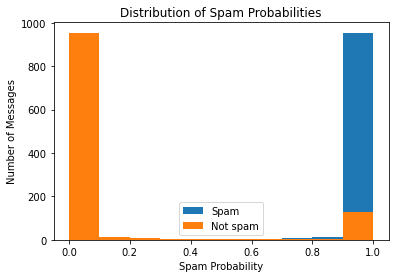

In [94]:
# plotting the distribution of spam probabilities
spam_probs_spam = spam_prob.T[0]
spam_probs_not_spam = spam_prob.T[1]

plt.hist(spam_probs_spam, label='Spam', alpha=1)
plt.hist(spam_probs_not_spam, label='Not spam', alpha=1)
plt.xlabel('Spam Probability')
plt.ylabel('Number of Messages')
plt.title('Distribution of Spam Probabilities')
plt.legend()
plt.show()

In [103]:
# measuring the accuracy of the model
score = Classifier.score(x_test_count, y_test)
precision = precision_score(y_test, preds, pos_label=1)
accuracy = accuracy_score(y_test, preds)
recall = recall_score(y_test, preds)
print("The score of the model is ",score)
print("Precision = ",precision)
print("Accuracy = ",accuracy)
print("Recall = ",recall)

The score of the model is  0.9838565022421525
Precision =  0.9568345323741008
Accuracy =  0.9838565022421525
Recall =  0.9172413793103448
